# [Dataset or task name]

Data Challenge [date]
Candidate: Isaac Chung
Time alloted: [time]

Task: [main task]

## 0. Import data
First let's import the data set, and see what's inside. Data is given in a csv file. Let's use pandas' read_csv function.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
col_names = ['sample_id','clump_thickness','uc_size','uc_shape','marginal_adhesion','single_epithelial','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=col_names)

# if you know what the NaN values are (e.g. '?'), use na_values='?' in the functon call

## 1. Initial Data Analysis:
1. Data set shape, types
2. NaN values
3. Duplicates

### 1.1 Shape and types
We have 699 rows and 11 features. All but one features are integers. 

In [3]:
print(df.shape)
print(df.info())

(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   uc_size            699 non-null    int64 
 3   uc_shape           699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   single_epithelial  699 non-null    int64 
 6   bare_nuclei        699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Let's check out the first 5 rows of the data, and see a brief summary.

In [4]:
df.head()

,sample_id,clump_thickness,uc_size,uc_shape,marginal_adhesion,single_epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 1.2 NaN values

We see that the first column is the sample id, columns 2-10 are cell features, and the last column is the class (2 for benign, 4 for malignant).
Upon inspection of the column 'bare_nuclei', it seems that there's something that is not 'NaN' that's causing it to be read as object type.

In [5]:
df.describe()

,sample_id,clump_thickness,uc_size,uc_shape,marginal_adhesion,single_epithelial,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
print('Number of values that are numeric in bare_nuclei:')
print(df['bare_nuclei'].str.isnumeric().sum())
print('\nNon numeric values:')
df.loc[~df['bare_nuclei'].str.isnumeric()]['bare_nuclei']

Number of values that are numeric in bare_nuclei:
683

Non numeric values:


23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: bare_nuclei, dtype: object

In [7]:
# Only use to_numeric if you know all data columns are numerical.
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce', downcast='integer')

In [8]:
df['bare_nuclei'].isna().sum()

16

Converting the column to integers returns some 'NaN' values. 16 rows have this. Since it takes up only 2.3% of the data, we temporarily drop these rows. 

In [9]:
df = df.dropna()

### 1.3 Duplicates
We also check for duplicated rows. Using all columns to check for duplicates, 8 rows are returned. Let's see what these rows are.

In [10]:
df.duplicated().sum()

8

In [11]:
df = df.drop_duplicates()

In [12]:
df.describe()

,sample_id,clump_thickness,uc_size,uc_shape,marginal_adhesion,single_epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 2. Data cleaning / formatting

As the 1st column is sample id, we can drop that from our analysis.
We can also separate the feature columns and target column for convenience.

In [13]:
df = df.drop(columns=['sample_id'])

In [14]:
features = df.drop(columns=['class'])
targets = df['class']

## 3. Exploratory Data Analysis

Next, let's visualize the distributions of the features. Before that, we want to check if any of the features are Normal.

In [15]:
def normality_test(df,col_list):
    """
    Given a dataframe determines whether each numerical column is Gaussian 
    Ho = Assumes distribution is Gaussian
    Ha = Assumes distribution is not Gaussian
    Params:
        - df
    Returns:
        - W Statistic
        - p-value
        - List of columns that do not have gaussian distribution
    """
    non_gauss=[]
    w_stat=[]
    # Determine if each sample of numerical feature is gaussian
    alpha = 0.05
    for n in col_list:
        stat,p=shapiro(df[n])
#         print(sns.distplot(df[n]))
#         print(skew(df[n]),kurtosis(df[n]))

        if p <= alpha: # Reject Ho -- Distribution is not normal
            non_gauss.append(n)
            w_stat.append(stat)
    # Dictionary of numerical features not gaussian and W-Statistic        
    norm_dict=dict(zip(non_gauss,w_stat))
    return norm_dict

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed. 

Here we see that all of the features have high w-values, thus we fail to reject the null hypothesis (feature distribution is a Normal distribution) for all features. 

In [16]:
normality_test(features,features.columns.values)

{'clump_thickness': 0.9028488993644714,
 'uc_size': 0.7170572280883789,
 'uc_shape': 0.7465598583221436,
 'marginal_adhesion': 0.6795672178268433,
 'single_epithelial': 0.7183128595352173,
 'bare_nuclei': 0.6696346402168274,
 'bland_chromatin': 0.836286187171936,
 'normal_nucleoli': 0.6497902274131775,
 'mitoses': 0.39928507804870605}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D511B6FAC8>,
      dtype=object)

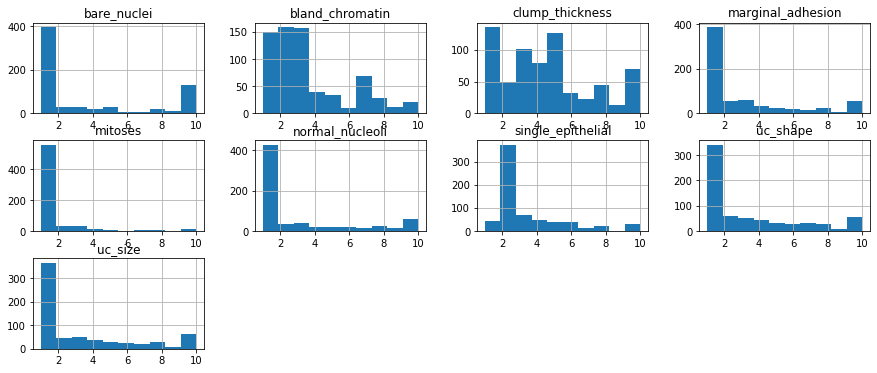

In [17]:
features.hist(bins=10, figsize=(15,6), layout=(3,4))

The boxplot can help us visualize potential outliers in each of the features.

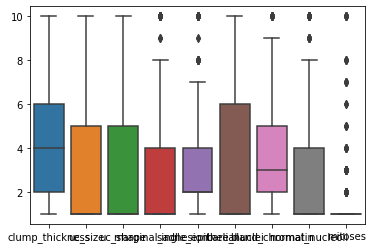

In [18]:
sns.boxplot(data=features)

We can show the correlation between features on a seaborn heatmap. Here we notice that F1 and F2 features are highly correlated. Using highly correlated features to train models would affect the model's ability to generalize to the test set well, since what that is doing is effectively giving those features more weighting (the weights for one changes the same way as those of the other).

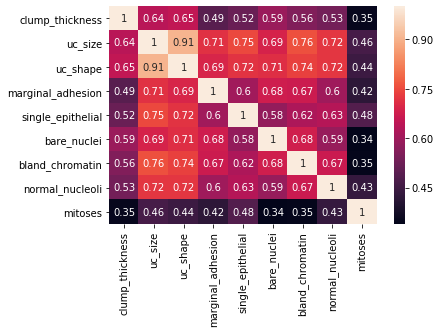

In [19]:
sns.heatmap(features.corr(), annot=True)

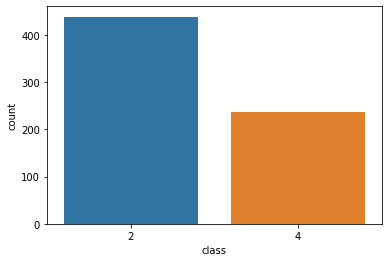

In [20]:
sns.countplot(x=df['class'])

## 4. Classification

The goal here is to predict whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.validation import check_is_fitted

In [22]:
class FeatureSelector(TransformerMixin, BaseEstimator):
    '''Select features using any sklearn method'''
    def __init__(self, transformer=None):
        self.transformer = transformer

    def fit(self, X, y=None, **kwargs):
        if self.transformer:
            self.transformer.fit(X, y)
        return self

    def transform(self, X):
        if self.transformer:
            X_r = self.transformer.transform(X)
            return X_r
        else:
            return X

In [23]:
class ClfEstimator(BaseEstimator):
    '''Choose model for classification'''
    def __init__(self, estimator=LogisticRegression()):
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        check_is_fitted(self.estimator)
        return self.estimator.predict(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [24]:
def class_report(y_test, y_pred):
    # sklearn classification report
    print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))
    
    # sklearn confusion matrix in seaborn heatmap
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);


### 4.1 Logistic Regression
We can first use a simple logistic regression model as a baseline model. Let's use the sklearn. Here we first use all of the raw features, and split the train-test set 70-30.

**Note 1**: Since we are dealing with cancer prognosis, it is important that we not only evaluate the accuracy of the model, but also the recall (True positive/(True positive + False negative)). We want to capture all cells that are truly cancerous, and prevent mis-predicting them as non-cancerous.

**Note 2**: Also, since the classes are imbalanced in the test set, the f1 score should be a better model evaluation metric than accuracy.

In [25]:
def cv_score_stats(estimator, X, y, scoring='recall', cv=5, n_jobs=-1):
    scores = cross_val_score(estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs)
    print('All scores:\n', np.sort(scores), '\n')
    print('Mean:', np.round(np.mean(scores), 3))
    print('Median:', np.round(np.median(scores),3))
    print('SD:', np.round(np.std(scores), 3))

We see that even though we have a average f1 score of 94%, the recall for malignant is at 88%

In [26]:
X = features.drop(columns=['uc_size']).copy()
label = LabelEncoder()
y = label.fit_transform(targets)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
pipeline = Pipeline(steps=[
    ('fs', FeatureSelector()),
    ('clf', ClfEstimator())
])

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       307
   Malignant       0.96      0.96      0.96       165

    accuracy                           0.97       472
   macro avg       0.97      0.97      0.97       472
weighted avg       0.97      0.97      0.97       472



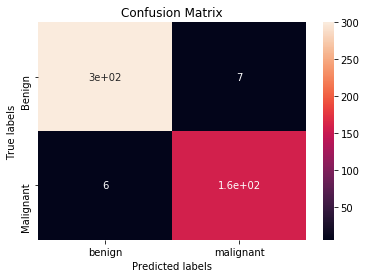

In [28]:
pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
class_report(y_train, y_pred_train)

In [29]:
cv_score_stats(pipeline, X_train, y_train)

All scores:
 [0.90322581 0.9375     0.94444444 0.96551724 0.97297297] 

Mean: 0.945
Median: 0.944
SD: 0.025


The features are rangng from 1-10. Here we scale the features to have zero mean and unit variance. 

Here we see that the recall on maglinant cells has improved from 88% to 90% by scaling our features.

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       307
   Malignant       0.96      0.96      0.96       165

    accuracy                           0.97       472
   macro avg       0.97      0.97      0.97       472
weighted avg       0.97      0.97      0.97       472



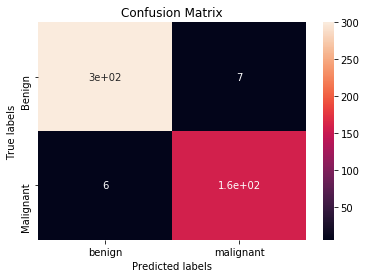

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline.fit(X_train_scaled, y_train)

y_pred_train = pipeline.predict(X_train_scaled)
class_report(y_train, y_pred_train)

### 4.2 KNN Classifier

KNN is a non-parametric model, i.e. it does not make any underlying assumptions on the underlying data distribution. 
Here we use the default value of k=5.

              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97       132
   Malignant       0.96      0.94      0.95        71

    accuracy                           0.97       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.97      0.97      0.97       203



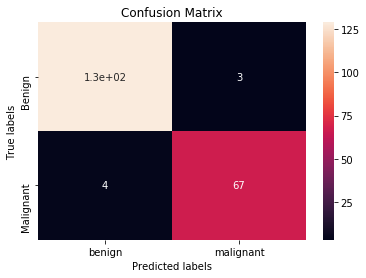

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
class_report(y_test,y_pred)

### 4.3  Random Forest Classifier

Here we want to use an bagging ensemble model which subsamples the data with replacement.

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       307
   Malignant       1.00      1.00      1.00       165

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472



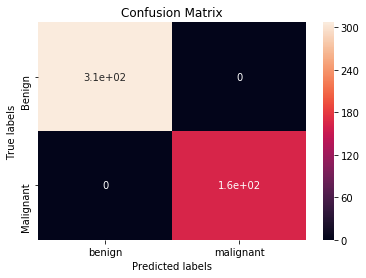

In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
class_report(y_train, y_pred_train)

              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       132
   Malignant       0.96      0.93      0.94        71

    accuracy                           0.96       203
   macro avg       0.96      0.95      0.96       203
weighted avg       0.96      0.96      0.96       203



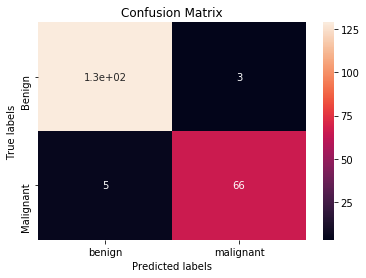

In [39]:
y_pred = rfc.predict(X_test)
class_report(y_test, y_pred)

The Random Forest classifier has feature importances after fitting. We can visualize these by sorting the feature importances from the most important to the least important. Here we see that the features of 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' are the top 2 most important features. 

(-1, 8)

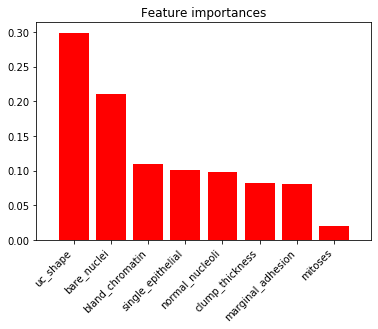

In [36]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center",tick_label = X_train.columns.values)
# plt.xticks(range(X.shape[1]), indices)

plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices],rotation=45,horizontalalignment='right')
plt.xlim([-1, X_train.shape[1]])

Tuning the model

In [33]:
# Now we will use RandomForest importances to recursively select features and tune the model
params = [
    {
        'fs__transformer': [RFE(RandomForestClassifier())],
        'fs__transformer__n_features_to_select': np.arange(3,9),
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [100, 200],
        'clf__estimator__max_depth': [2, 3]
    }]
grid = GridSearchCV(pipeline, params, cv=5, verbose=0, n_jobs=-1, scoring='recall')
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'clf__estimator': RandomForestClassifier(max_depth=2), 'clf__estimator__max_depth': 2, 'clf__estimator__n_estimators': 100, 'fs__transformer': RFE(estimator=RandomForestClassifier(), n_features_to_select=7), 'fs__transformer__n_features_to_select': 7}
Best score: 0.9836336336336338


              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       307
   Malignant       0.95      0.99      0.97       165

    accuracy                           0.98       472
   macro avg       0.97      0.98      0.98       472
weighted avg       0.98      0.98      0.98       472



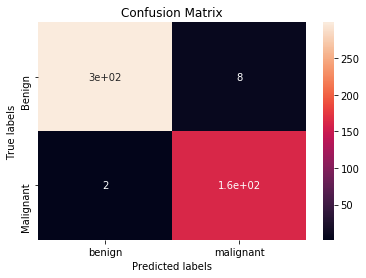

In [34]:
y_pred_train = grid.predict(X_train)
class_report(y_train, y_pred_train)

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       132
   Malignant       0.96      0.96      0.96        71

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



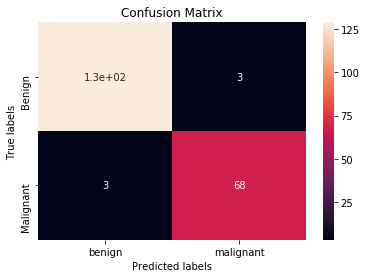

In [35]:
y_pred = grid.predict(X_test)
class_report(y_test, y_pred)

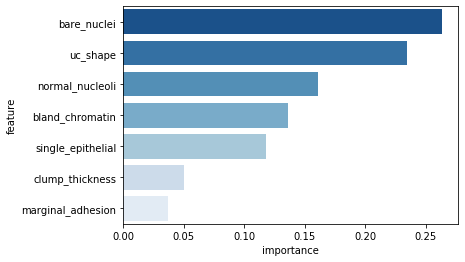

In [37]:
# Feature importance
selected_features = X_train.columns[grid.best_estimator_.named_steps['fs'].transformer.support_]
importances = grid.best_estimator_.named_steps['clf'].estimator.feature_importances_
imp = pd.DataFrame({'feature': selected_features, 'importance': importances})
imp = imp.sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=imp, palette='Blues_r');

## 5. Conclusion

### 5.1 Data
Given a set of biopsied breast cell data, we want to model whether a cell is benign or cancerous. First we cleaned up the data set, and looked at the distribution and correlations of the feautures. Then we fit the data with some common classifier models. Since the classes are imbalanced, we should be using f1-score instead of accuracy to evaluate our models. We select the models starting from the simplest ones. 

### 5.2 Takeaway
Another key point is to understand the application of this data exercise. We would like stakeholder to use the insights from our model, i.e. doctors and physicians. What they care about for cancer prognosis (screening) is to have minimal false negatives. They do not want actual cancer patients to slip through the cracks. So a very key metric we use in this case is recall. With this model, doctors can screen for canerous breast biopsy cells better, and potentially save more lives. 

### 5.3 Model selection
To conclude, the KNN classifier with k=11 neighbours outperforms all other classifiers in this exercise, achieving 91% recall. Given more time, I would further explore more complex models that could further increase the recall rate.